In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

data = pd.read_csv('ch17_cs_training.csv')
print('原始数据概况：')
data.info()

原始数据概况：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float

In [2]:
from sklearn.ensemble import RandomForestRegressor
# 用随机森林对MonthlyIncome月收入缺失值进行预测填充
#参数：  df-Daraframe，Pandas数据框
#返回值：df-Daraframe，填充了MonthlyIncome缺失值的数据框
def set_missing(df):
#将第5列MonthlyIncome提前到第0列，便于后续划分数据
    print('随机森林回归填充0值：')
    process_df = df.iloc[:,[5,0,1,2,3,4,6,7,8,9]]
#分成有数值/缺失值两组
    known = process_df.loc[process_df['MonthlyIncome']!=0].values
    unknown = process_df.loc[process_df['MonthlyIncome']==0].values
    X = known[:, 1:]
    y = known[:, 0]
#用X，y训练随机森林回归算法
    rfr = RandomForestRegressor(random_state=0, n_estimators=200,max_depth=3,n_jobs=-1)
    rfr.fit(X,y)
#得到的模型进行缺失值预测
    predicted = rfr.predict(unknown[:, 1:]).round(0)
#用得到的预测结果填补原缺失数据
    df.loc[df['MonthlyIncome']==0, 'MonthlyIncome'] = predicted
    return df

In [3]:
#离群点检测、删除，删除标准为：
#最小阈值=第一四分位点-1.5*（第三四分位点-第一四分位点）
#最大阈值=第三四分位点+1.5*（第三四分位点-第一四分位点）
#小于最小阈值，大于最大阈值的行将会被删除
#参数：  df-Daraframe，Pandas数据框
#       cname-字符串，进行离群点删除的列名
#返回值：df-Daraframe，完成了离群点检测删除的数据框
def outlier_processing(df,cname):
    s=df[cname]
    oneQuoter=s.quantile(0.25)
    threeQuote=s.quantile(0.75)
    irq=threeQuote-oneQuoter
    min=oneQuoter-1.5*irq
    max=threeQuote+1.5*irq
    df=df[df[cname]<=max]
    df=df[df[cname]>=min]
    return df

MonthlyIncome属性离群点原始分布：


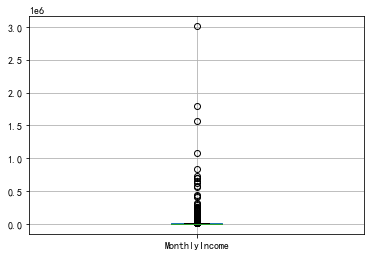

删除离群点、填充缺失数据：
随机森林回归填充0值：
处理MonthlyIncome后数据概况：
<class 'pandas.core.frame.DataFrame'>
Int64Index: 115390 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      115390 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  115390 non-null  float64
 2   age                                   115390 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  115390 non-null  int64  
 4   DebtRatio                             115390 non-null  float64
 5   MonthlyIncome                         115390 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       115390 non-null  int64  
 7   NumberOfTimes90DaysLate               115390 non-null  int64  
 8   NumberRealEstateLoansOrLines          115390 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  115390 non-null  int64  
 10  NumberOfDependents  

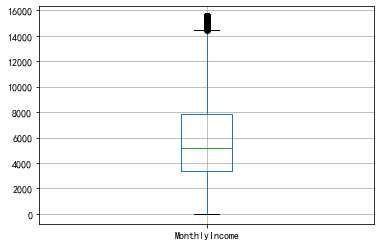

In [4]:
#对MonthlyIncome列进行数据整理
print('MonthlyIncome属性离群点原始分布：')
data[['MonthlyIncome']].boxplot()
plt.savefig('ch17_cs01.png', dpi=300, bbox_inches='tight')
plt.show()
print('删除离群点、填充缺失数据：')
data=outlier_processing(data,'MonthlyIncome')
data=set_missing(data)
print('处理MonthlyIncome后数据概况：')
data.info()
data[['MonthlyIncome']].boxplot()
plt.savefig('ch17_cs02.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
#对其他属性进行离群点处理
data=outlier_processing(data,'age')
data=outlier_processing(data,'RevolvingUtilizationOfUnsecuredLines')
data=outlier_processing(data,'DebtRatio')
data=outlier_processing(data,'NumberOfOpenCreditLinesAndLoans')
data=outlier_processing(data,'NumberRealEstateLoansOrLines')
data=outlier_processing(data,'NumberOfDependents')

NumberOfTime30-59DaysPastDueNotWorse,      NumberOfTime60-89DaysPastDueNotWorse,      NumberOfTimes90DaysLate原始分布：


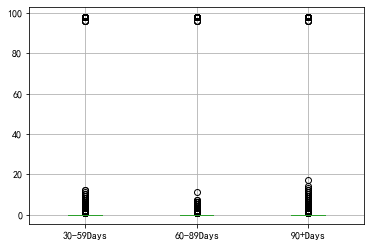

删除离群点后：


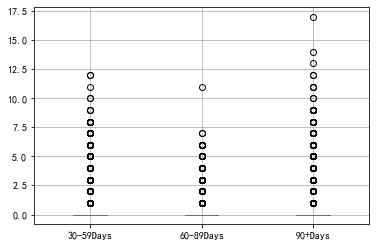

处理离群点后后数据概况：
<class 'pandas.core.frame.DataFrame'>
Int64Index: 94179 entries, 1 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      94179 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  94179 non-null  float64
 2   age                                   94179 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  94179 non-null  int64  
 4   DebtRatio                             94179 non-null  float64
 5   MonthlyIncome                         94179 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       94179 non-null  int64  
 7   NumberOfTimes90DaysLate               94179 non-null  int64  
 8   NumberRealEstateLoansOrLines          94179 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  94179 non-null  int64  
 10  NumberOfDependents                    94179 non-null  float64
dtypes

In [6]:
#以下三个属性取值过于集中，三个四分位点的值都相等。
#直接使用outlier_processing函数会导致所有取值被删除，
#因此观察分布后，手工处理
Features=['NumberOfTime30-59DaysPastDueNotWorse',
          'NumberOfTime60-89DaysPastDueNotWorse',
          'NumberOfTimes90DaysLate']
Features_labale=['30-59Days','60-89Days','90+Days']
print('NumberOfTime30-59DaysPastDueNotWorse,\
      NumberOfTime60-89DaysPastDueNotWorse,\
      NumberOfTimes90DaysLate原始分布：')
data[Features].boxplot()
plt.xticks([1,2,3],Features_labale)
plt.savefig('ch17_cs03.png', dpi=300, bbox_inches='tight')
plt.show()

print('删除离群点后：')
data= data[data['NumberOfTime30-59DaysPastDueNotWorse'] < 90]
data= data[data['NumberOfTime60-89DaysPastDueNotWorse'] < 90]
data= data[data['NumberOfTimes90DaysLate'] < 90]

data[Features].boxplot()
plt.xticks([1,2,3],Features_labale)
plt.savefig('ch17_cs04.png',dpi=300, bbox_inches='tight')
plt.show()
print('处理离群点后后数据概况：')
data.info()

In [7]:
#测试集与训练集生成
from sklearn.model_selection import train_test_split
#SeriousDlqin2yrs原始值为0表示正常，为1表示违约
#而习惯上信用评分越高的，违约可能越小
#因此将该值转置，原值0的，置为1；原值1的，置为0
data['SeriousDlqin2yrs']=1-data['SeriousDlqin2yrs']
Y = data['SeriousDlqin2yrs']
X = data.iloc[:, 1:]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
# print(Y_train)
train = pd.concat([Y_train, X_train], axis=1)
test = pd.concat([Y_test, X_test], axis=1)
clasTest = test.groupby('SeriousDlqin2yrs')['SeriousDlqin2yrs'].count()
print('训练集数据：')
print(train.shape)
print('测试集数据：')
print(test.shape)

训练集数据：
(65925, 11)
测试集数据：
(28254, 11)


In [8]:
#指定数量进行分箱，并计算WOE和IV
#参数：  res-series,dataframe中的结果列
#       feat-series,dataframe中的属性列
#       n-数值，分箱数量，默认为10
#返回值：v_feature-Daraframe，含有用于计算WOE和IV的数值
#       iv-数值，IV结果
#       cut-List列表，分箱数据
#       woe-List列表，
def mono_bin(res, feat, n = 10):
    good=res.sum()
    bad=res.count()-good
    d1 = pd.DataFrame({'feat': feat, 'res': res, 'Bucket': pd.cut(feat, n)})
    d2 = d1.groupby('Bucket', as_index = True)
    d3 = pd.DataFrame(d2.feat.min(), columns = ['min'])
    d3['min']=d2.min().feat
    d3['max'] = d2.max().feat
    d3['sum'] = d2.sum().res
    d3['total'] = d2.count().res
    d3['rate'] = d2.mean().res
    d3['woe']=np.log((d3['rate']/(1-d3['rate']))/(good/bad))
    d3['goodattribute']=d3['sum']/good
    d3['badattribute']=(d3['total']-d3['sum'])/bad
    iv=((d3['goodattribute']-d3['badattribute'])*d3['woe']).sum()
    d4 = (d3.sort_values(by = 'min'))
    cut=[]
    cut.append(float('-inf'))#负无穷大
    for i in range(1,n):
        qua=feat.quantile(i/(n))
        cut.append(round(qua,4))
    cut.append(float('inf'))#正无穷大
    woe=list(d4['woe'].round(3))
    return d4,iv,cut,woe

In [9]:
#指定间隔进行分箱，并计算WOE和IV
#参数：  res-series,dataframe中的结果列
#       feat-series,dataframe中的属性列
#       cat-List列表，分箱数值
#返回值：v_feature-Daraframe，含有用于计算WOE和IV的数值
#       iv-数值，IV结果
#       woe-List列表，
def self_bin(res,feat,cat):
    good=res.sum()
    bad=res.count()-good
    d1=pd.DataFrame({'feat':feat,'res':res,'Bucket':pd.cut(feat,cat)})
    d2=d1.groupby('Bucket', as_index = True)
    d3 = pd.DataFrame(d2.feat.min(), columns=['min'])
    d3['min'] = d2.min().feat
    d3['max'] = d2.max().feat
    d3['sum'] = d2.sum().res
    d3['total'] = d2.count().res
    d3['rate'] = d2.mean().res
    d3['woe'] = np.log((d3['rate'] / (1 - d3['rate'])) / (good / bad))
    d3['goodattribute'] = d3['sum'] / good
    d3['badattribute'] = (d3['total'] - d3['sum']) / bad
    iv = ((d3['goodattribute'] - d3['badattribute']) * d3['woe']).sum()
    d4 = (d3.sort_values(by='min'))
    woe = list(d4['woe'].round(3))
    return d4,iv,woe

In [10]:
#对第1、2、4、5列数据进行10段分箱
pinf = float('inf')#正无穷大
ninf = float('-inf')#负无穷大
dfx1, ivx1,cutx1,woex1=mono_bin(train['SeriousDlqin2yrs'],
                                train['RevolvingUtilizationOfUnsecuredLines'],n=10)
#显示RevolvingUtilizationOfUnsecuredLines分箱和woe信息，限于篇幅，其他列不逐一显示
print("=" * 60)
print('RevolvingUtilizationOfUnsecuredLines分箱，woe信息：')
print(dfx1)
dfx2, ivx2,cutx2,woex2=mono_bin(train['SeriousDlqin2yrs'],train['age'], n=10)
dfx4, ivx4,cutx4,woex4 =mono_bin(train['SeriousDlqin2yrs'],
                                 train['DebtRatio'], n=10)
dfx5, ivx5,cutx5,woex5 =mono_bin(train['SeriousDlqin2yrs'],
                                 train['MonthlyIncome'], n=10)

RevolvingUtilizationOfUnsecuredLines分箱，woe信息：
                        min       max    sum  total      rate       woe  \
Bucket                                                                    
(-0.00141, 0.141]  0.000000  0.141145  30655  31234  0.981463  1.282661   
(0.141, 0.282]     0.141163  0.282305   8003   8284  0.966079  0.662629   
(0.282, 0.423]     0.282315  0.423405   5374   5653  0.950646  0.271528   
(0.423, 0.565]     0.423499  0.564593   4070   4387  0.927741 -0.134091   
(0.565, 0.706]     0.564625  0.705765   3179   3525  0.901844 -0.468705   
(0.706, 0.847]     0.705912  0.846890   2762   3181  0.868280 -0.800748   
(0.847, 0.988]     0.846983  0.988024   3078   3770  0.816446 -1.194138   
(0.988, 1.129]     0.988155  1.128589   4462   5631  0.792399 -1.347139   
(1.129, 1.27]      1.129353  1.269841     91    176  0.517045 -2.618380   
(1.27, 1.412]      1.271081  1.411533     47     84  0.559524 -2.447358   

                   goodattribute  badattribute  
Buck

In [11]:
#对第3、6、7、8、9、10列数据进行指定间隔分箱
cutx3 = [ninf, 0, 1, 3, 5, pinf]
cutx6 = [ninf, 1, 2, 3, 5, pinf]
cutx7 = [ninf, 0, 1, 3, 5, pinf]
cutx8 = [ninf, 0,1,2, 3, pinf]
cutx9 = [ninf, 0, 1, 3, pinf]
cutx10 = [ninf, 0, 1, 2, 3, 5, pinf]
dfx3,ivx3,woex3= self_bin(train['SeriousDlqin2yrs'],
                            train['NumberOfTime30-59DaysPastDueNotWorse'], cutx3)
#显示NumberOfTime30-59DaysPastDueNotWorse分箱和woe信息，
#限于篇幅，其他列不逐一显示
print("=" * 60)
print('NumberOfTime30-59DaysPastDueNotWorse分箱，woe信息：')
print(dfx3)
dfx6,ivx6 ,woex6= self_bin(train['SeriousDlqin2yrs'],
                            train['NumberOfOpenCreditLinesAndLoans'], cutx6)
dfx7,ivx7,woex7= self_bin(train['SeriousDlqin2yrs'],
                            train['NumberOfTimes90DaysLate'], cutx7)
dfx8,ivx8,woex8= self_bin(train['SeriousDlqin2yrs'],
                            train['NumberRealEstateLoansOrLines'], cutx8)
dfx9,ivx9,woex9= self_bin(train['SeriousDlqin2yrs'],
                            train['NumberOfTime60-89DaysPastDueNotWorse'], cutx9)
dfx10,ivx10,woex10= self_bin(train['SeriousDlqin2yrs'],
                               train['NumberOfDependents'], cutx10)

NumberOfTime30-59DaysPastDueNotWorse分箱，woe信息：
             min  max    sum  total      rate       woe  goodattribute  \
Bucket                                                                   
(-inf, 0.0]    0    0  53249  55416  0.960896  0.515048       0.862737   
(0.0, 1.0]     1    1   6150   7155  0.859539 -0.875123       0.099642   
(1.0, 3.0]     2    3   2010   2804  0.716833 -1.757781       0.032566   
(3.0, 5.0]     4    5    259    456  0.567982 -2.412963       0.004196   
(5.0, inf]     6   11     53     94  0.563830 -2.429868       0.000859   

             badattribute  
Bucket                     
(-inf, 0.0]      0.515461  
(0.0, 1.0]       0.239058  
(1.0, 3.0]       0.188868  
(3.0, 5.0]       0.046860  
(5.0, inf]       0.009753  


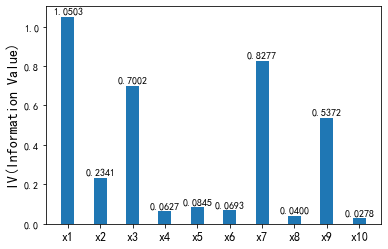

In [12]:
#按照IV选取属性
ivlist=[ivx1,ivx2,ivx3,ivx4,ivx5,ivx6,ivx7,ivx8,ivx9,ivx10]
index=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']
fig1 = plt.figure(1)
ax1 = fig1.add_subplot(1, 1, 1)
x = np.arange(len(index))+1
ax1.bar(x, ivlist, width=0.4)
ax1.set_xticks(x)
ax1.set_xticklabels(index, rotation=0, fontsize=12)
ax1.set_ylabel('IV(Information Value)', fontsize=14)
for a, b in zip(x, ivlist):
    plt.text(a, b + 0.01, '%.4f' % b, ha='center', va='bottom', fontsize=10)
plt.savefig('ch17_cs05.png', dpi=300, bbox_inches='tight')
plt.show()

In [13]:
#将原始数据转化为相应的woe值，用于计算信用得分
#参数：  feat-series,dataframe中的属性列
#       cut-List列表，该属性的分箱数值
#       woe-List列表，该属性的woe值
#返回值：res-List列表，输入的属性列对应的woe数值列
def get_woe(feat,cut,woe):
    res=[]
    for row in feat.iteritems():
        value=row[1]
        j=len(cut)-2
        m=len(cut)-2
        while j>=0:
            if value>=cut[j]:
                j=-1
            else:
                j -=1
                m -= 1
        res.append(woe[m])
    return res

In [14]:
#将训练集各属性值替换成woe
woe_train =pd.DataFrame()
woe_train['SeriousDlqin2yrs'] = train['SeriousDlqin2yrs'] 
woe_train['RevolvingUtilizationOfUnsecuredLines'] = get_woe(
        train['RevolvingUtilizationOfUnsecuredLines'], cutx1, woex1)
woe_train['age'] = get_woe(train['age'], cutx2, woex2)
woe_train['NumberOfTime30-59DaysPastDueNotWorse'] = get_woe(
        train['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, woex3)
woe_train['DebtRatio'] = get_woe(train['DebtRatio'], cutx4, woex4)
woe_train['MonthlyIncome'] = get_woe(train['MonthlyIncome'], cutx5, woex5)
woe_train['NumberOfOpenCreditLinesAndLoans'] = get_woe(
        train['NumberOfOpenCreditLinesAndLoans'], cutx6, woex6)
woe_train['NumberOfTimes90DaysLate'] = get_woe(
        train['NumberOfTimes90DaysLate'], cutx7, woex7)
woe_train['NumberRealEstateLoansOrLines'] = get_woe(
        train['NumberRealEstateLoansOrLines'], cutx8, woex8)
woe_train['NumberOfTime60-89DaysPastDueNotWorse'] = get_woe(
        train['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, woex9)
woe_train['NumberOfDependents'] = get_woe(train['NumberOfDependents'], 
                                          cutx10, woex10)

In [15]:
#将测试集各属性值替换成woe
woe_test =pd.DataFrame()
woe_test['SeriousDlqin2yrs'] = test['SeriousDlqin2yrs'] 
woe_test['RevolvingUtilizationOfUnsecuredLines'] = get_woe(
        test['RevolvingUtilizationOfUnsecuredLines'], cutx1, woex1)
woe_test['age'] = get_woe(test['age'], cutx2, woex2)
woe_test['NumberOfTime30-59DaysPastDueNotWorse'] = get_woe(
        test['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, woex3)
woe_test['DebtRatio'] = get_woe(test['DebtRatio'], cutx4, woex4)
woe_test['MonthlyIncome'] = get_woe(test['MonthlyIncome'], cutx5, woex5)
woe_test['NumberOfOpenCreditLinesAndLoans'] = get_woe(
        test['NumberOfOpenCreditLinesAndLoans'], cutx6, woex6)
woe_test['NumberOfTimes90DaysLate'] = get_woe(
        test['NumberOfTimes90DaysLate'], cutx7, woex7)
woe_test['NumberRealEstateLoansOrLines'] = get_woe(
        test['NumberRealEstateLoansOrLines'], cutx8, woex8)
woe_test['NumberOfTime60-89DaysPastDueNotWorse'] = get_woe(
        test['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, woex9)
woe_test['NumberOfDependents'] = get_woe(
        test['NumberOfDependents'], cutx10, woex10)

In [16]:
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc

Y=woe_train['SeriousDlqin2yrs']
X=woe_train.drop(['SeriousDlqin2yrs','DebtRatio',
                  'MonthlyIncome','NumberOfOpenCreditLinesAndLoans',
                  'NumberRealEstateLoansOrLines','NumberOfDependents'],axis=1)
X1=sm.add_constant(X)
logit=sm.Logit(Y,X1)
Logit_model=logit.fit()
print('输出拟合的各项系数：')
print(Logit_model.params)

Optimization terminated successfully.
         Current function value: 0.182077
         Iterations 8
输出拟合的各项系数：
const                                   10.466645
RevolvingUtilizationOfUnsecuredLines     0.543796
age                                      0.384398
NumberOfTime30-59DaysPastDueNotWorse     0.990557
NumberOfTimes90DaysLate                  1.713207
NumberOfTime60-89DaysPastDueNotWorse     1.306427
dtype: float64


模型AUC曲线：


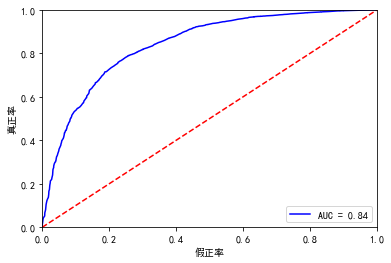

In [17]:
Y_test = woe_test['SeriousDlqin2yrs']
X_test = woe_test.drop(['SeriousDlqin2yrs', 'DebtRatio', 'MonthlyIncome',
                        'NumberOfOpenCreditLinesAndLoans',
                        'NumberRealEstateLoansOrLines',
                        'NumberOfDependents'], axis=1)
X3 = sm.add_constant(X_test)
resu = Logit_model.predict(X3)
fpr, tpr, threshold = roc_curve(Y_test, resu)
rocauc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % rocauc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('真正率')
plt.xlabel('假正率')
plt.savefig('ch17_cs06.png', dpi=300, bbox_inches='tight')
print('模型AUC曲线：')
plt.show()

In [18]:
#根据woe分段，计算某一列属性的woe取值所对应的分数分段取值
#参数：  coe-数值，Logit模型计算得到的该列属性对应的系数
#       woe-List列表，该属性的woe值
#       factor-数值，调整系数
#返回值：scores-List列表，每一个woe分段对应的分数
def get_score(coe,woe,factor):
    scores=[]
    for w in woe:
        score=round(coe*w*factor,0)
        scores.append(score)
    return scores

In [19]:
#根据属性取值，计算其对应的分数
#参数：  feat-series,dataframe中的属性列
#       cut-List列表，该属性的分箱数值
#       score-List列表，该属性woe分段对应的分数（来自get_score函数）
#返回值：res-List列表，输入的属性列对应的woe数值列
def compute_score(feat,cut,score):
    res = []
    for row in feat.iteritems():
        value=row[1]
        j=len(cut)-2
        m=len(cut)-2
        while j>=0:
            if value>=cut[j]:
                j=-1
            else:
                j -=1
                m -= 1
        res.append(score[m])
    return res

In [20]:
import math
#coe为逻辑回归模型的系数
coe=Logit_model.params
# 我们取600分为基础分值，调整方法见参考文献《信用评分卡模型的建立》
p = 20 / math.log(2)
q = 600 - 20 * math.log(20) / math.log(2)
baseScore = round(q + p * coe[0], 0)

#各列分箱对应分数
x1 = get_score(coe[1], woex1, p)
print('第1列属性取值在各分箱段对应的分数')
print(x1)
#限于篇幅，其他列不逐一显示
x2 = get_score(coe[2], woex2, p)
x3 = get_score(coe[3], woex3, p)
x7 = get_score(coe[4], woex7, p)
x9 = get_score(coe[5], woex9, p)

#计算分数
test['BaseScore']=np.zeros(len(test))+baseScore
test['x1'] = compute_score(test['RevolvingUtilizationOfUnsecuredLines'], 
                           cutx1, x1)
test['x2'] = compute_score(test['age'], cutx2, x2)
test['x3'] = compute_score(test['NumberOfTime30-59DaysPastDueNotWorse'], 
                           cutx3, x3)
test['x7'] = compute_score(test['NumberOfTimes90DaysLate'], cutx7, x7)
test['x9'] = compute_score(test['NumberOfTime60-89DaysPastDueNotWorse'], 
                           cutx9, x9)
test['Score'] = test['x1'] + test['x2'] + test['x3'] + test['x7'] +test['x9'] \
+baseScore

第1列属性取值在各分箱段对应的分数
[20.0, 10.0, 4.0, -2.0, -7.0, -13.0, -19.0, -21.0, -41.0, -38.0]


测试集中正常用户组信用评分统计描述
count    26442.000000
mean       613.992625
std         29.223215
min        452.000000
25%        599.000000
50%        618.000000
75%        635.000000
max        658.000000
Name: Score, dtype: float64
测试集中违约用户组信用评分统计描述
count    1812.000000
mean      562.347682
std        44.657634
min       420.000000
25%       532.000000
50%       565.000000
75%       596.000000
max       657.000000
Name: Score, dtype: float64


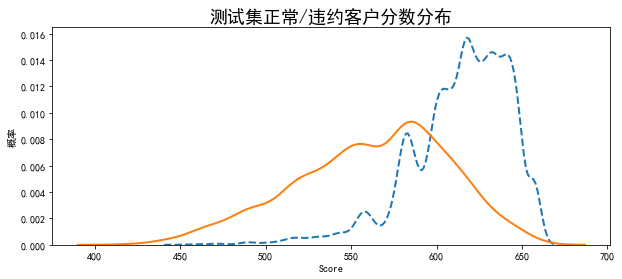

In [21]:
#考察正常/违约用户的信用评分分数分布情况
Normal = test.loc[test['SeriousDlqin2yrs']==1]
Charged = test.loc[test['SeriousDlqin2yrs']==0]

print('测试集中正常用户组信用评分统计描述')
print(Normal['Score'].describe())
print('测试集中违约用户组信用评分统计描述')
print(Charged['Score'].describe())

import seaborn as sns; 
plt.figure(figsize=(10,4))
sns.kdeplot(Normal['Score'],label='正常',linewidth=2,linestyle='--')
sns.kdeplot(Charged['Score'],label='违约',linewidth=2,linestyle='-')
plt.xlabel('Score',fontdict={'size':10})
plt.ylabel('概率',fontdict={'size':10})
plt.title('测试集正常/违约客户分数分布',fontdict={'size':18})
plt.savefig('ch19_cs07.png', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
#计算单个客户的信用评分
custInfo={'RevolvingUtilizationOfUnsecuredLines':0.248537,
               'age':48,
               'NumberOfTime30-59DaysPastDueNotWorse':0,
               'DebtRatio':0.177586,
               'MonthlyIncome':4166,
               'NumberOfOpenCreditLinesAndLoans':11,
               'NumberOfTimes90DaysLate':0,
               'NumberRealEstateLoansOrLines':1,
               'NumberOfTime60-89DaysPastDueNotWorse':0,
               'NumberOfDependents':0}
custData = pd.DataFrame(custInfo,pd.Index(range(1)))
custData.drop(['DebtRatio', 'MonthlyIncome', 
               'NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines', 
               'NumberOfDependents'], axis=1)
custData['x1'] = compute_score(custData['RevolvingUtilizationOfUnsecuredLines'], 
                               cutx1, x1)
custData['x2'] = compute_score(custData['age'], cutx2, x2)
custData['x3'] = compute_score(custData['NumberOfTime30-59DaysPastDueNotWorse'], 
                               cutx3, x3)
custData['x7'] = compute_score(custData['NumberOfTimes90DaysLate'], cutx7, x7)
custData['x9'] = compute_score(custData['NumberOfTime60-89DaysPastDueNotWorse'], 
                               cutx9, x9)
custData['Score'] = custData['x1'] + custData['x2'] + custData['x3'] + custData['x7'] +custData['x9']  + baseScore    
print('该客户的信用评分为：')
print(custData.loc[0,'Score'])

该客户的信用评分为：
613.0
